# File and libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


filepath=r'data/df_merch_encoded.csv'


file_tag = "df_merch_mv_input"

# DSLabs functions

In [2]:
%run "scripts/dslabs_functions.py"


# Data functions

In [3]:
%run "scripts/data_functions.py"


data_functions lodaded


# Load

In [4]:
# test_data=True
test_data=False

if test_data==True:

    data=pd.read_csv(filepath)

    # 1% sample
    # data=data.sample(frac=0.05, replace=False)
    

else:
    data=pd.read_csv(filepath)
    # 50% sample
    # data=data.sample(frac=0.5, replace=False)

 


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371174 entries, 0 to 371173
Data columns (total 41 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   event_name                       371174 non-null  int64  
 1   device_category                  371174 non-null  int64  
 2   device_mobile_brand_name         371174 non-null  int64  
 3   device_mobile_model_name         371172 non-null  float64
 4   device_operating_system          371174 non-null  int64  
 5   device_operating_system_version  259100 non-null  float64
 6   device_language                  199044 non-null  float64
 7   device_web_info_browser          371174 non-null  int64  
 8   device_web_info_browser_version  361818 non-null  float64
 9   geo_country                      371174 non-null  int64  
 10  geo_region                       366758 non-null  float64
 11  geo_city                         350888 non-null  float64
 12  tr

# Missing Values Analysis

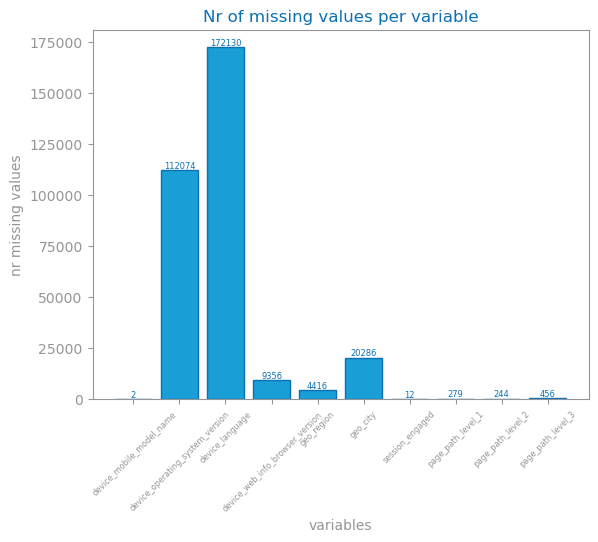

In [5]:
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_bar_chart

mv: dict[str, int] = {}
for var in data.columns:
    nr: int = data[var].isna().sum()
    if nr > 0:
        mv[var] = nr

figure()
plot_bar_chart(
    list(mv.keys()),
    list(mv.values()),
    title="Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
# savefig(f"{file_tag}_mv.png")
show()

# MV 1 - Most Frequent

In [6]:
from numpy import ndarray
from pandas import concat
from sklearn.impute import SimpleImputer, KNNImputer
from dslabs_functions import get_variable_types, mvi_by_filling


data_1 =  mvi_by_filling(data, strategy="frequent")

data_1.describe()


,event_name,device_category,device_mobile_brand_name,device_mobile_model_name,device_operating_system,device_operating_system_version,device_language,device_web_info_browser,device_web_info_browser_version,geo_region,...,day_cos,day_of_week_nr_sin,day_of_week_nr_cos,geo_country,session_engaged,returning_user,year,quarter,is_weekend,domain
count,371174.000000,371174.000000,371174.000000,371174.000000,371174.000000,371174.000000,371174.000000,371174.000000,371174.000000,371174.000000,...,371174.000000,3.711740e+05,371174.000000,371174.000000,371174.000000,371174.000000,371174.000000,371174.000000,371174.000000,371174.000000
mean,6.810108,1.811512,4.768637,10.423577,3.713075,4.568738,6.789549,2.190862,4.350126,2994.513360,...,-0.062876,8.476304e-02,0.084539,1.146177,0.915201,0.256977,1.262195,1.262195,0.198169,1.965321
std,1.856088,0.971258,1.341502,3.000685,1.584449,2.426806,1.550640,0.641260,1.782531,1761.127083,...,0.701289,6.565159e-01,0.744754,0.353284,0.278582,0.436967,0.439829,0.439829,0.398620,0.182966
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.994869,-8.660254e-01,-1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,6.000000,1.000000,4.000000,8.000000,2.000000,2.000000,6.789549,2.000000,3.000000,1580.000000,...,-0.758758,-2.449294e-16,-0.500000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
50%,8.000000,1.000000,5.000000,10.000000,4.000000,4.568738,6.789549,2.000000,4.000000,3621.000000,...,-0.050649,0.000000e+00,0.500000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
75%,8.000000,3.000000,5.000000,12.000000,5.000000,5.000000,8.000000,3.000000,4.350126,4382.000000,...,0.688967,8.660254e-01,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,0.000000,2.000000
max,13.000000,3.000000,9.000000,19.000000,6.000000,10.000000,8.000000,4.000000,11.000000,6491.000000,...,1.000000,8.660254e-01,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000


## MV1 evaluation prep

### mv1 target

In [7]:
from numpy import array, ndarray

target = "returning_user"
labels: list = list(data_1[target].unique())
labels.sort()
print(f"Labels={labels}")

positive: int = 1
negative: int = 0
values: dict[str, list[int]] = {
    "Original": [
        len(data_1[data_1[target] == negative]),
        len(data_1[data_1[target] == positive]),
    ]
}

y: array = data_1.pop(target).to_list()
X: ndarray = data_1.values

Labels=[0.0, 1.0]


### mv1 split

<Axes: title={'center': 'Data distribution per dataset'}>

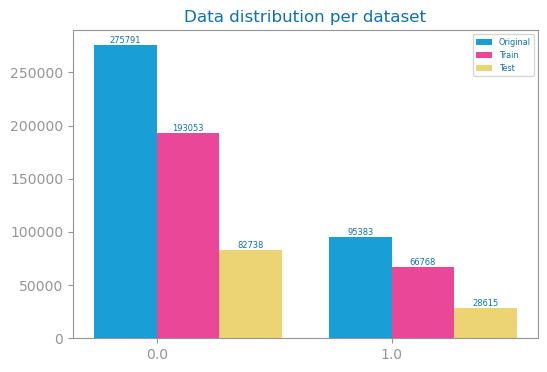

In [8]:
from pandas import concat
from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
from dslabs_functions import plot_multibar_chart


trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

train: DataFrame = concat(
    [DataFrame(trnX, columns=data_1.columns), DataFrame(trnY, columns=[target])], axis=1
)
# train.to_csv(f"data/{file_tag}_train.csv", index=False)

test: DataFrame = concat(
    [DataFrame(tstX, columns=data_1.columns), DataFrame(tstY, columns=[target])], axis=1
)
# test.to_csv(f"data/{file_tag}_test.csv", index=False)

values["Train"] = [
    len(train[train[target] == negative]),
    len(train[train[target] == positive]),
]
values["Test"] = [
    len(test[test[target] == negative]),
    len(test[test[target] == positive]),
]

figure(figsize=(6, 4))
plot_multibar_chart(labels, values, title="Data distribution per dataset")

## mv1 naive bayes evaluation

In [9]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

clf = GaussianNB()
clf.fit(trnX, trnY)
pred_trnY: array = clf.predict(trnX)
print(f"Score over Train: {clf.score(trnX, trnY):.3f}")
print(f"Score over Test: {clf.score(tstX, tstY):.3f}")

Score over Train: 0.736
Score over Test: 0.736


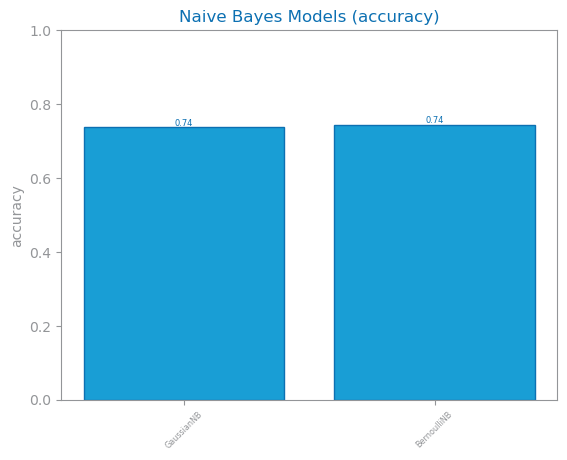

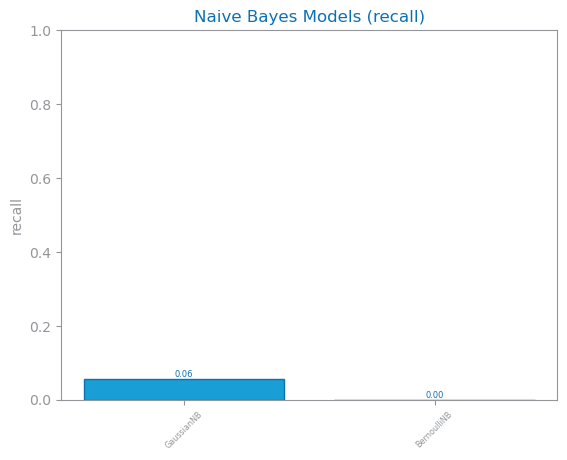

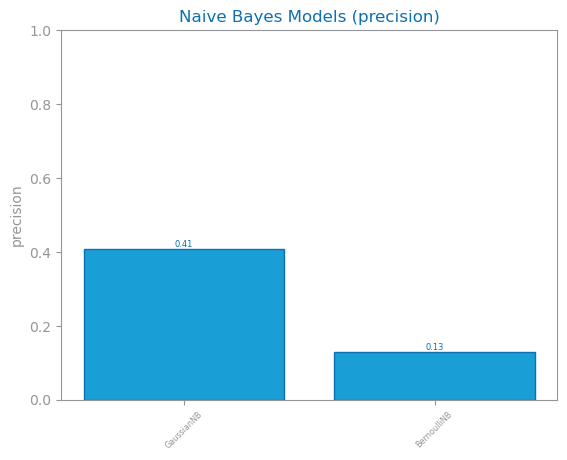

In [10]:

figure()

best_model, params = naive_Bayes_study(trnX, trnY, tstX, tstY, "accuracy")
figure()

best_model, params = naive_Bayes_study(trnX, trnY, tstX, tstY, "recall")
figure()

best_model, params = naive_Bayes_study(trnX, trnY, tstX, tstY, "precision")


# savefig(f"images/{file_tag}_nb_{eval_metric}_study.png")
show()

### mv1 nayve bayes accuracy, recall, precision

In [11]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

pred_tstY: array = clf.predict(tstX)

acc: float = accuracy_score(tstY, pred_tstY)
recall: float = recall_score(tstY, pred_tstY)
prec: float = precision_score(tstY, pred_tstY)
print(f"accuracy={acc:.3f} recall={recall:.3f} precision={prec:.3f}")

accuracy=0.736 recall=0.057 precision=0.409


### mv1 nayve bayes performance analysis

<Figure size 640x480 with 0 Axes>

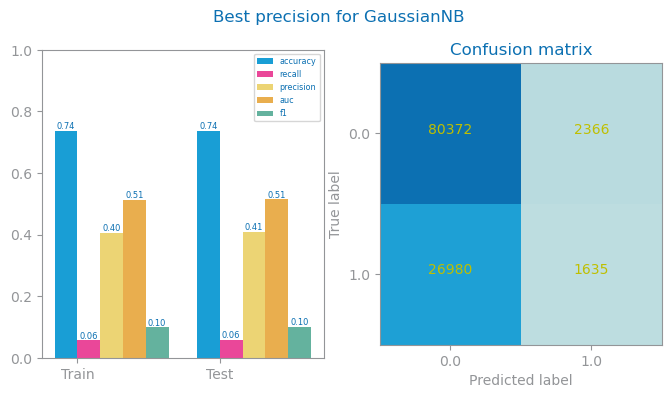

In [12]:
from dslabs_functions import plot_evaluation_results

prd_trn: array = best_model.predict(trnX)
prd_tst: array = best_model.predict(tstX)
figure()
plot_evaluation_results(params, trnY, prd_trn, tstY, prd_tst, labels)
# savefig(f'images/{file_tag}_{params["name"]}_best_{params["metric"]}_eval.png')
show()

### mv 1 naive bayes confusion matrix

In [13]:
from pandas import unique
from sklearn.metrics import confusion_matrix

labels: list = list(unique(tstY))
labels.sort()

prdY: array = clf.predict(tstX)
cnf_mtx_tst: ndarray = confusion_matrix(tstY, prdY, labels=labels)
print(cnf_mtx_tst)

[[80372  2366]
 [26980  1635]]


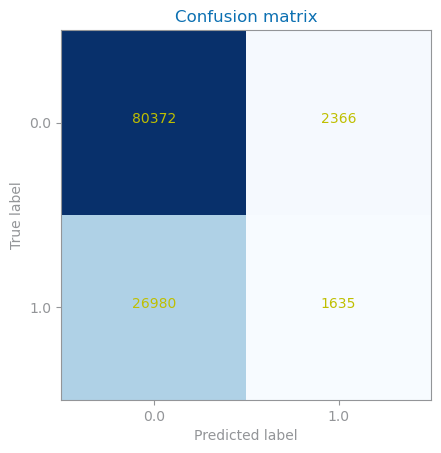

In [14]:
figure()
plot_confusion_matrix(cnf_mtx_tst, labels)
show()

## mv1 KNN evaluation

### mv1 knn accuracy

In [15]:
from typing import Literal
from numpy import array, ndarray
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import CLASS_EVAL_METRICS, DELTA_IMPROVE, plot_multiline_chart
from dslabs_functions import read_train_test_from_files, plot_evaluation_results

def knn_study(
        trnX: ndarray, trnY: array, tstX: ndarray, tstY: array, k_max: int=19, lag: int=2, metric='accuracy'
        ) -> tuple[KNeighborsClassifier | None, dict]:
    dist: list[Literal['manhattan', 'euclidean', 'chebyshev']] = ['manhattan', 'euclidean', 'chebyshev']

    kvalues: list[int] = [i for i in range(1, k_max+1, lag)]
    best_model: KNeighborsClassifier | None = None
    best_params: dict = {'name': 'KNN', 'metric': metric, 'params': ()}
    best_performance: float = 0.0

    values: dict[str, list] = {}
    for d in dist:
        y_tst_values: list = []
        for k in kvalues:
            clf = KNeighborsClassifier(n_neighbors=k, metric=d)
            clf.fit(trnX, trnY)
            prdY: array = clf.predict(tstX)
            eval: float = CLASS_EVAL_METRICS[metric](tstY, prdY)
            y_tst_values.append(eval)
            if eval - best_performance > DELTA_IMPROVE:
                best_performance: float = eval
                best_params['params'] = (k, d)
                best_model = clf
            # print(f'KNN {d} k={k}')
        values[d] = y_tst_values
    print(f'KNN best with k={best_params['params'][0]} and {best_params['params'][1]}')
    plot_multiline_chart(kvalues, values, title=f'KNN Models ({metric})', xlabel='k', ylabel=metric, percentage=True)

    return best_model, best_params


eval_metric = 'recall'

best_model, params = knn_study(trnX, trnY, tstX, tstY, k_max=25, metric=eval_metric)
# savefig(f'images/{file_tag}_knn_{eval_metric}_study.png')
show()

### mv1 knn best performance

<Figure size 640x480 with 0 Axes>

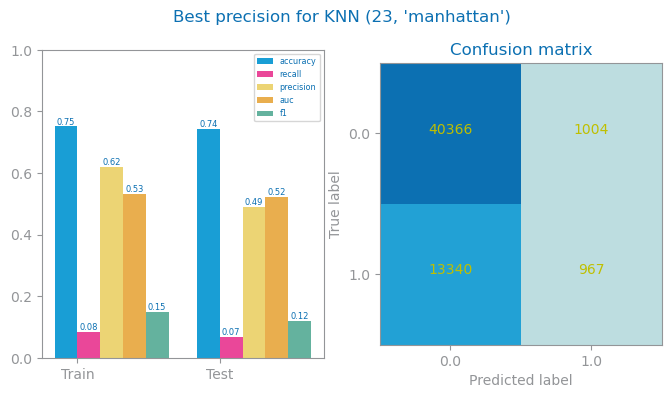

In [53]:
prd_trn: array = best_model.predict(trnX)
prd_tst: array = best_model.predict(tstX)
figure()
plot_evaluation_results(params, trnY, prd_trn, tstY, prd_tst, labels)
# savefig(f'images/{file_tag}_knn_{params["name"]}_best_{params["metric"]}_eval.png')
show()

### mv1 knn overfitting

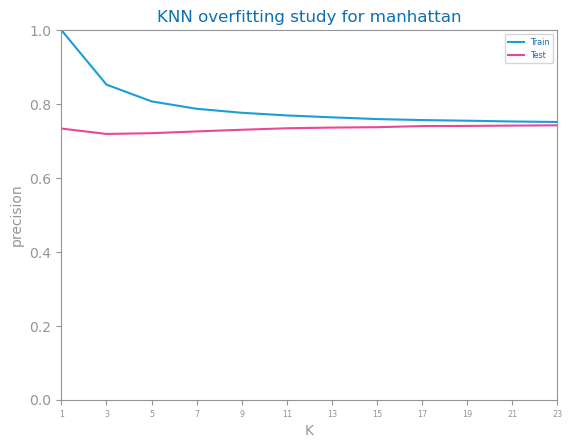

In [54]:
from matplotlib.pyplot import figure, savefig

distance: Literal["manhattan", "euclidean", "chebyshev"] = params["params"][1]
K_MAX = 25
kvalues: list[int] = [i for i in range(1, K_MAX, 2)]
y_tst_values: list = []
y_trn_values: list = []
acc_metric: str = "accuracy"
for k in kvalues:
    clf = KNeighborsClassifier(n_neighbors=k, metric=distance)
    clf.fit(trnX, trnY)
    prd_tst_Y: array = clf.predict(tstX)
    prd_trn_Y: array = clf.predict(trnX)
    y_tst_values.append(CLASS_EVAL_METRICS[acc_metric](tstY, prd_tst_Y))
    y_trn_values.append(CLASS_EVAL_METRICS[acc_metric](trnY, prd_trn_Y))

figure()
plot_multiline_chart(
    kvalues,
    {"Train": y_trn_values, "Test": y_tst_values},
    title=f"KNN overfitting study for {distance}",
    xlabel="K",
    ylabel=str(eval_metric),
    percentage=True,
)
# savefig(f"images/{file_tag}_knn_overfitting.png")
show()

# MV 2 - KNN input (sample only)

- for computational resons, full df takes too long to process and it seems it is not performing any better on sampled version

In [78]:
if test_data==False:
    data=data.sample(frac=0.05, replace=False)


data_2 = mvi_by_filling(data, strategy="knn")


data_2.describe()

,event_name,device_category,device_mobile_brand_name,device_mobile_model_name,device_operating_system,device_operating_system_version,device_language,device_web_info_browser,device_web_info_browser_version,geo_country,...,local_hour_sin,local_hour_cos,local_minute_sin,local_minute_cos,hour_minute_fraction_sin,hour_minute_fraction_cos,day_sin,day_cos,day_of_week_nr_sin,day_of_week_nr_cos
count,3712.000000,3712.000000,3712.000000,3712.000000,3712.000000,3712.000000,3712.000000,3712.000000,3712.000000,3712.000000,...,3.712000e+03,3712.000000,3.712000e+03,3712.000000,3712.000000,3712.000000,3712.000000,3712.000000,3.712000e+03,3712.000000
mean,6.808459,1.836476,4.769666,10.462823,3.710668,4.524623,6.816002,2.206358,4.412716,1.148168,...,-1.589254e-02,0.033761,-4.495132e-03,-0.003422,-0.016658,-0.005970,0.058792,-0.073914,8.305632e-02,0.085129
std,1.838744,0.977480,1.342671,2.988024,1.596552,2.493619,1.718087,0.657836,1.842394,0.355314,...,6.879006e-01,0.725031,6.952402e-01,0.718943,0.702422,0.711730,0.708103,0.699955,6.585452e-01,0.743262
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,-9.976688e-01,-0.990686,-9.996456e-01,-0.998583,-0.999995,-0.999999,-0.998717,-0.994869,-8.660254e-01,-1.000000
25%,6.000000,1.000000,4.000000,8.000000,2.000000,2.000000,6.400000,2.000000,3.200000,1.000000,...,-6.310879e-01,-0.775711,-6.783118e-01,-0.769834,-0.704788,-0.713788,-0.651372,-0.758758,-2.449294e-16,-0.500000
50%,8.000000,1.000000,5.000000,10.000000,4.000000,4.400000,7.400000,2.000000,4.000000,1.000000,...,-2.449294e-16,-0.068242,-2.449294e-16,-0.026621,-0.041239,-0.005893,0.101168,-0.050649,0.000000e+00,0.500000
75%,8.000000,3.000000,5.000000,12.000000,5.000000,5.800000,8.000000,3.000000,4.600000,1.000000,...,6.310879e-01,0.725520,6.783118e-01,0.734774,0.689295,0.707338,0.790776,0.688967,8.660254e-01,1.000000
max,13.000000,3.000000,9.000000,19.000000,6.000000,10.000000,8.000000,4.000000,11.000000,2.000000,...,9.976688e-01,1.000000,9.996456e-01,1.000000,1.000000,1.000000,0.998717,1.000000,8.660254e-01,1.000000


## MV2 train test split

### mv2 target

In [79]:

target = "returning_user"
labels: list = list(data_2[target].unique())
labels.sort()
print(f"Labels={labels}")

positive: int = 1
negative: int = 0
values: dict[str, list[int]] = {
    "Original": [
        len(data_2[data_2[target] == negative]),
        len(data_2[data_2[target] == positive]),
    ]
}

y: array = data_2.pop(target).to_list()
X: ndarray = data_2.values

Labels=[0.0, 1.0]


### mv2 split

<Axes: title={'center': 'Data distribution per dataset'}>

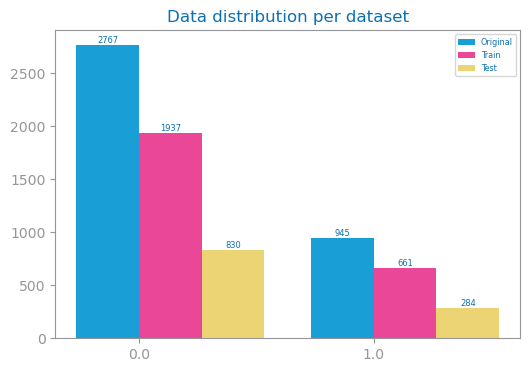

In [80]:
trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

train: DataFrame = concat(
    [DataFrame(trnX, columns=data_2.columns), DataFrame(trnY, columns=[target])], axis=1
)
# train.to_csv(f"data/{file_tag}_train.csv", index=False)

test: DataFrame = concat(
    [DataFrame(tstX, columns=data_2.columns), DataFrame(tstY, columns=[target])], axis=1
)
# test.to_csv(f"data/{file_tag}_test.csv", index=False)

values["Train"] = [
    len(train[train[target] == negative]),
    len(train[train[target] == positive]),
]
values["Test"] = [
    len(test[test[target] == negative]),
    len(test[test[target] == positive]),
]

figure(figsize=(6, 4))
plot_multibar_chart(labels, values, title="Data distribution per dataset")

## mv2 naive bayes

In [81]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

clf = BernoulliNB()
clf.fit(trnX, trnY)
pred_trnY: array = clf.predict(trnX)
print(f"Score over Train: {clf.score(trnX, trnY):.3f}")
print(f"Score over Test: {clf.score(tstX, tstY):.3f}")

Score over Train: 0.744
Score over Test: 0.741


### mv2 naive bayes accuracy, recall, precision

In [82]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

pred_tstY: array = clf.predict(tstX)

acc: float = accuracy_score(tstY, pred_tstY)
recall: float = recall_score(tstY, pred_tstY)
prec: float = precision_score(tstY, pred_tstY)
print(f"accuracy={acc:.3f} recall={recall:.3f} precision={prec:.3f}")

accuracy=0.741 recall=0.004 precision=0.167


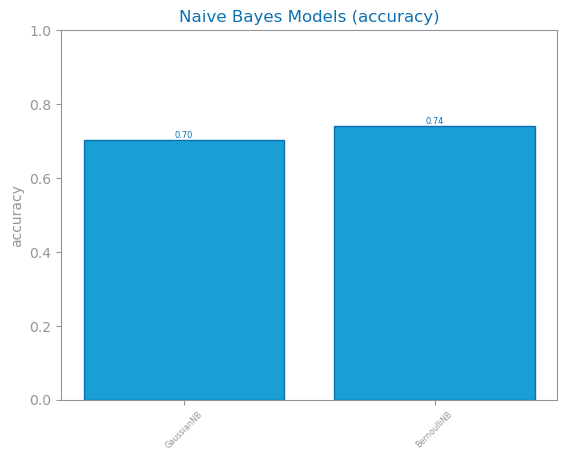

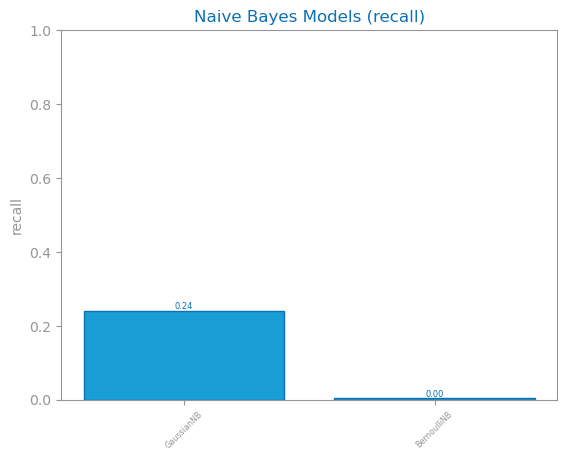

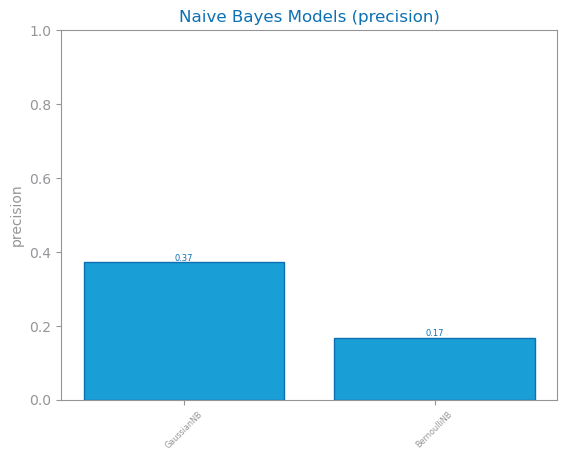

In [83]:

figure()

best_model, params = naive_Bayes_study(trnX, trnY, tstX, tstY, "accuracy")
figure()

best_model, params = naive_Bayes_study(trnX, trnY, tstX, tstY, "recall")
figure()

best_model, params = naive_Bayes_study(trnX, trnY, tstX, tstY, "precision")


# savefig(f"images/{file_tag}_nb_{eval_metric}_study.png")
show()

### mv 2 naive bayes confusion matrix

In [84]:
from pandas import unique
from sklearn.metrics import confusion_matrix

labels: list = list(unique(tstY))
labels.sort()

prdY: array = clf.predict(tstX)
cnf_mtx_tst: ndarray = confusion_matrix(tstY, prdY, labels=labels)
print(cnf_mtx_tst)

[[825   5]
 [283   1]]


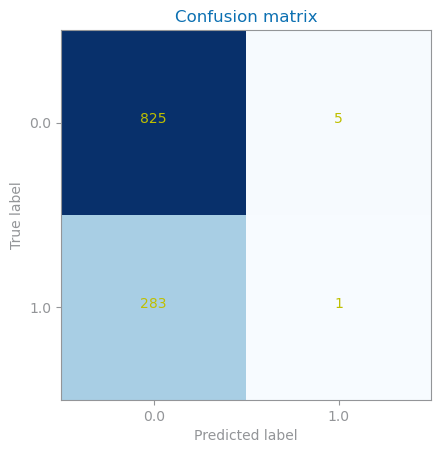

In [85]:
figure()
plot_confusion_matrix(cnf_mtx_tst, labels)
show()

## mv2 KNN evaluation

### mv2 knn accuracy

KNN best with k=25 and manhattan


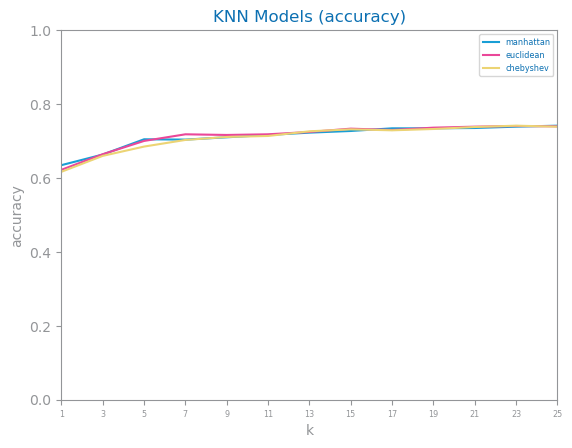

KNN best with k=1 and euclidean


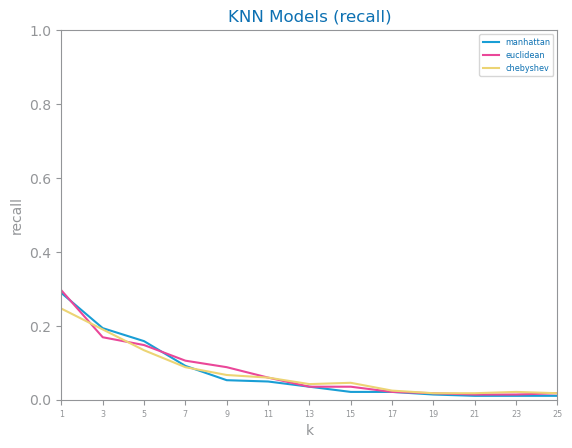

KNN best with k=23 and chebyshev


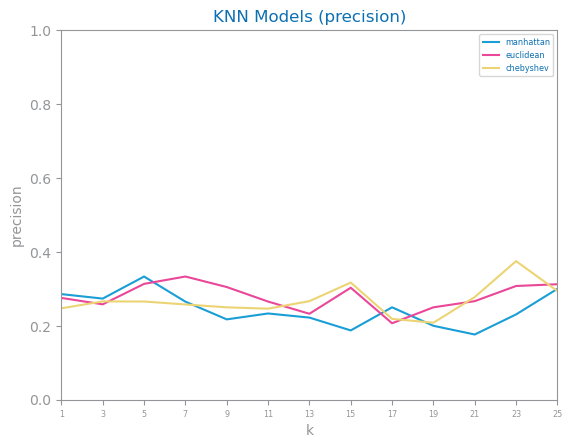

In [86]:
# eval_metric = 'accuracy'

best_model, params = knn_study(trnX, trnY, tstX, tstY, k_max=25, metric='accuracy')
# savefig(f'images/{file_tag}_knn_{eval_metric}_study.png')
show()


best_model, params = knn_study(trnX, trnY, tstX, tstY, k_max=25, metric='recall')
# savefig(f'images/{file_tag}_knn_{eval_metric}_study.png')
show()


best_model, params = knn_study(trnX, trnY, tstX, tstY, k_max=25, metric='precision')
# savefig(f'images/{file_tag}_knn_{eval_metric}_study.png')
show()

### mv2 knn best performance

<Figure size 640x480 with 0 Axes>

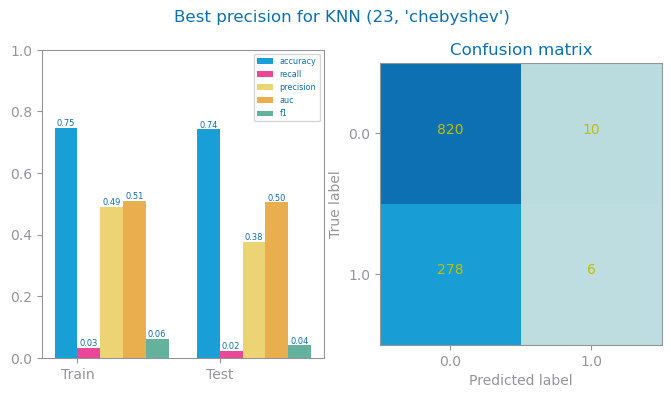

In [87]:
prd_trn: array = best_model.predict(trnX)
prd_tst: array = best_model.predict(tstX)
figure()
plot_evaluation_results(params, trnY, prd_trn, tstY, prd_tst, labels)
# savefig(f'images/{file_tag}_knn_{params["name"]}_best_{params["metric"]}_eval.png')
show()

### mv2 knn overfitting

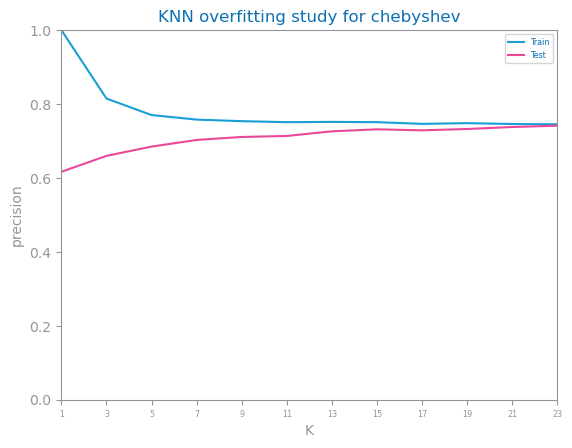

In [88]:
distance: Literal["manhattan", "euclidean", "chebyshev"] = params["params"][1]
K_MAX = 25
kvalues: list[int] = [i for i in range(1, K_MAX, 2)]
y_tst_values: list = []
y_trn_values: list = []
acc_metric: str = "accuracy"
for k in kvalues:
    clf = KNeighborsClassifier(n_neighbors=k, metric=distance)
    clf.fit(trnX, trnY)
    prd_tst_Y: array = clf.predict(tstX)
    prd_trn_Y: array = clf.predict(trnX)
    y_tst_values.append(CLASS_EVAL_METRICS[acc_metric](tstY, prd_tst_Y))
    y_trn_values.append(CLASS_EVAL_METRICS[acc_metric](trnY, prd_trn_Y))

figure()
plot_multiline_chart(
    kvalues,
    {"Train": y_trn_values, "Test": y_tst_values},
    title=f"KNN overfitting study for {distance}",
    xlabel="K",
    ylabel=str(eval_metric),
    percentage=True,
)
# savefig(f"images/{file_tag}_knn_overfitting.png")
show()

# MV3 - drop nulls

In [89]:
# numeric_vars: list[str] = get_variable_types(data)["numeric"]

data_3 = data.dropna(axis=1, how="any", inplace=False)

## mv3 target

In [90]:
from numpy import array, ndarray

target = "returning_user"
labels: list = list(data_3[target].unique())
labels.sort()
print(f"Labels={labels}")

positive: int = 1
negative: int = 0
values: dict[str, list[int]] = {
    "Original": [
        len(data_3[data_3[target] == negative]),
        len(data_3[data_3[target] == positive]),
    ]
}

y: array = data_3.pop(target).to_list()
X: ndarray = data_3.values

Labels=[0, 1]


## mv3 split

<Axes: title={'center': 'Data distribution per dataset'}>

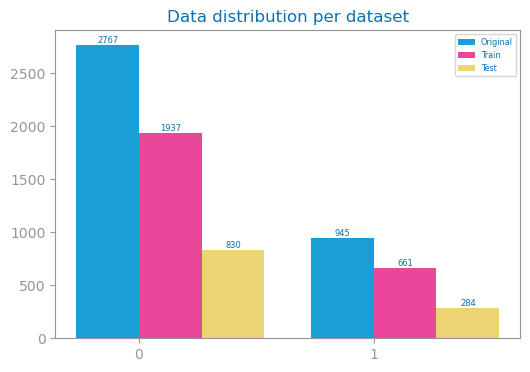

In [91]:
from pandas import concat
from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
from dslabs_functions import plot_multibar_chart


trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

train: DataFrame = concat(
    [DataFrame(trnX, columns=data_3.columns), DataFrame(trnY, columns=[target])], axis=1
)
# train.to_csv(f"data/{file_tag}_train.csv", index=False)

test: DataFrame = concat(
    [DataFrame(tstX, columns=data_3.columns), DataFrame(tstY, columns=[target])], axis=1
)
# test.to_csv(f"data/{file_tag}_test.csv", index=False)

values["Train"] = [
    len(train[train[target] == negative]),
    len(train[train[target] == positive]),
]
values["Test"] = [
    len(test[test[target] == negative]),
    len(test[test[target] == positive]),
]

figure(figsize=(6, 4))
plot_multibar_chart(labels, values, title="Data distribution per dataset")

## mv3 naive bayes

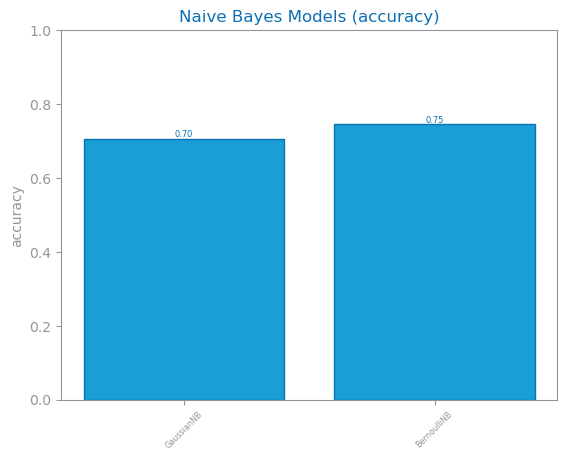

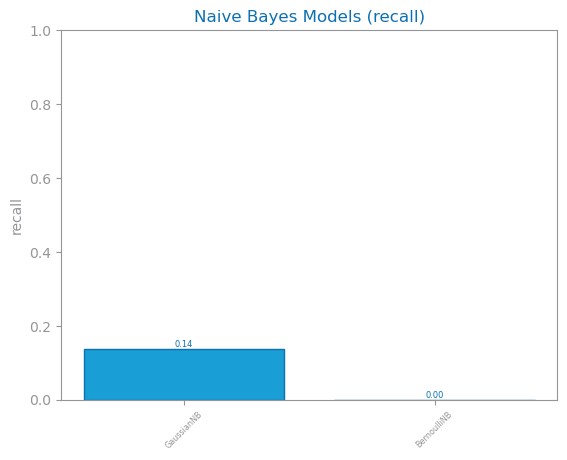

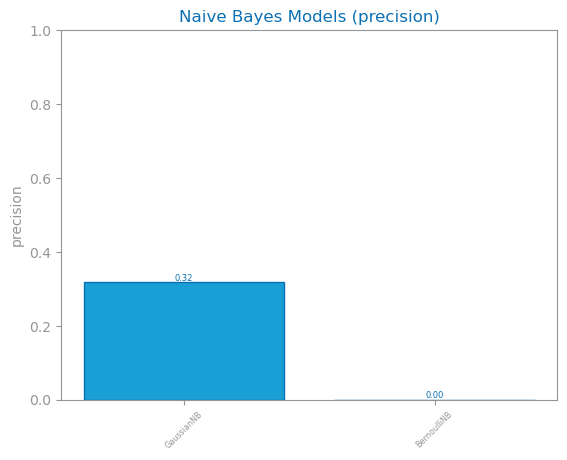

In [92]:
figure()

best_model, params = naive_Bayes_study(trnX, trnY, tstX, tstY, "accuracy")
figure()

best_model, params = naive_Bayes_study(trnX, trnY, tstX, tstY, "recall")
figure()

best_model, params = naive_Bayes_study(trnX, trnY, tstX, tstY, "precision")


# savefig(f"images/{file_tag}_nb_{eval_metric}_study.png")
show()

In [93]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

clf = GaussianNB()
clf.fit(trnX, trnY)
pred_trnY: array = clf.predict(trnX)
print(f"Score over Train: {clf.score(trnX, trnY):.3f}")
print(f"Score over Test: {clf.score(tstX, tstY):.3f}")

Score over Train: 0.718
Score over Test: 0.705


### mv3 naive bayes accuracy, recall, precision

In [94]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

pred_tstY: array = clf.predict(tstX)

acc: float = accuracy_score(tstY, pred_tstY)
recall: float = recall_score(tstY, pred_tstY)
prec: float = precision_score(tstY, pred_tstY)
print(f"accuracy={acc:.3f} recall={recall:.3f} precision={prec:.3f}")

accuracy=0.705 recall=0.137 precision=0.317


### mv3 naive bayes confusion matrix

In [95]:
from pandas import unique
from sklearn.metrics import confusion_matrix

labels: list = list(unique(tstY))
labels.sort()

prdY: array = clf.predict(tstX)
cnf_mtx_tst: ndarray = confusion_matrix(tstY, prdY, labels=labels)
print(cnf_mtx_tst)

[[746  84]
 [245  39]]


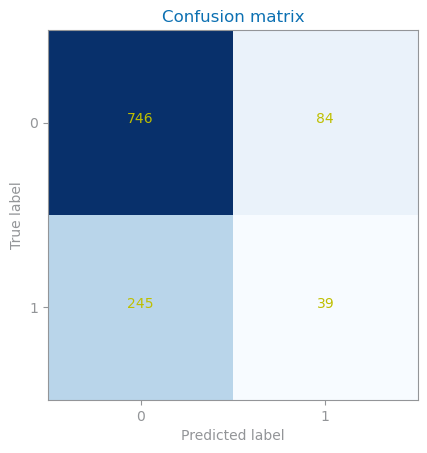

In [96]:
figure()
plot_confusion_matrix(cnf_mtx_tst, labels)
show()

## mv3 KNN evaluation

### mv3 knn accuracy

KNN best with k=5 and manhattan


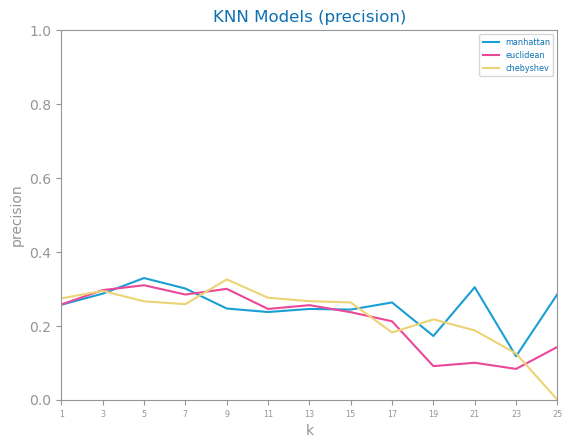

In [97]:
eval_metric = 'precision'

best_model, params = knn_study(trnX, trnY, tstX, tstY, k_max=25, metric=eval_metric)
# savefig(f'images/{file_tag}_knn_{eval_metric}_study.png')
show()

### mv3 knn best performance

<Figure size 640x480 with 0 Axes>

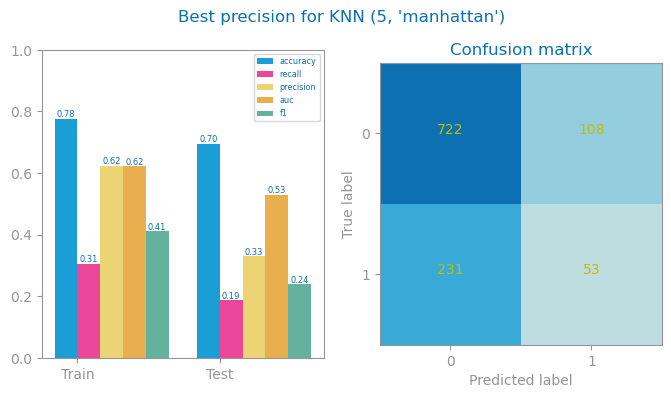

In [98]:
prd_trn: array = best_model.predict(trnX)
prd_tst: array = best_model.predict(tstX)
figure()
plot_evaluation_results(params, trnY, prd_trn, tstY, prd_tst, labels)
# savefig(f'images/{file_tag}_knn_{params["name"]}_best_{params["metric"]}_eval.png')
show()

# save to csv

In [99]:
# # choose final version
# data_final=data_1

# # Saving to CSV files
# data_final.to_csv('data/df_merch_mv_input.csv',index=False)
